In [1]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker

# Display options
from IPython.display import display
pd.options.display.max_columns = None

np.set_printoptions(threshold=30)

# Plots style
from cycler import cycler

matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['lines.markersize'] = 10

matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['xtick.color'] = '#A9A9A9'
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['ytick.color'] = '#A9A9A9'

matplotlib.rcParams['grid.color'] = '#ffffff'

matplotlib.rcParams['axes.facecolor'] = '#ffffff'

matplotlib.rcParams['axes.spines.left'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.bottom'] = False

matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['#2EBCE7', '#84EE29', '#FF8177'])

$$
\def\var{{\text{Var}}} % Variance
\def\corr{{\text{Corr}}} % Correlation
\def\cov{{\text{Cov}}} % Covariance
\DeclareMathOperator{\expval}{\mathbb{E}} % expected value\n
\newcommand\norm[1]{\lVert#1\rVert} % norm
\def\setR{{\rm I\!R}} % Sets
\def\rx{{\textrm{X}}} % Scalar random variables
\def\ry{{\textrm{Y}}}
\def\rz{{\textrm{Z}}}
\def\rvx{{\textbf{X}}} % Vector random variables
\def\rvy{{\textbf{Y}}}
\def\rvz{{\textbf{Z}}}
\def\vtheta{{\boldsymbol{\theta}}} % Vectors
\def\va{{\boldsymbol{a}}}
\def\vb{{\boldsymbol{b}}}
\def\vi{{\boldsymbol{i}}}
\def\vj{{\boldsymbol{j}}}
\def\vp{{\boldsymbol{p}}}
\def\vq{{\boldsymbol{q}}}
\def\vu{{\boldsymbol{u}}}
\def\vv{{\boldsymbol{v}}}
\def\vw{{\boldsymbol{w}}}
\def\vx{{\boldsymbol{x}}}
\def\vy{{\boldsymbol{y}}}
\def\vz{{\boldsymbol{z}}}
\def\evu{{u}} % Elements of vectors
\def\evv{{v}}
\def\evw{{w}}
\def\evx{{x}}
\def\evy{{y}}
\def\evz{{z}}
\def\mA{{\boldsymbol{A}}} % Matrices
\def\mB{{\boldsymbol{B}}}
\def\mC{{\boldsymbol{C}}}
\def\mD{{\boldsymbol{D}}}
\def\mI{{\boldsymbol{I}}}
\def\mQ{{\boldsymbol{Q}}}
\def\mS{{\boldsymbol{S}}}
\def\mT{{\boldsymbol{T}}}
\def\mU{{\boldsymbol{U}}}
\def\mV{{\boldsymbol{V}}}
\def\mW{{\boldsymbol{W}}}
\def\mX{{\boldsymbol{X}}}
\def\mLambda{{\boldsymbol{\Lambda}}}
\def\mSigma{{\boldsymbol{\Sigma}}}
\def\emA{{A}} % Elements of matrices
\def\emB{{B}}
\def\emX{{X}}
\def\tT{{T}} % Transformations
$$



One goal of data science is to find patterns in data. For instance, if
you try to predict the price of an appartement, you can look at a lot of
different appartements and their sell prices, and try to understand the
link between the appartment features and prices. It is a common practice
in science: using observations to understand systems.

The goal of probability is to deal with uncertainty. To make sense of
data through machine learning, you have to deal with uncertainty. There
are multiple possible sources of uncertainty. It can comes from the data
itself, from the data that you don’t have, from the inherent
stochasticity of the system you want to model, from the simplicity of
your model, etc. For instance, if you build a model predicting who will
develop cancer using medical imaging, you are likely to miss a lot of
features that might be useful to do the task, like health records,
occupational hazards or environmental exposure. There are so many
variables that you can’t measure, and that’s where the uncertainty lies.

This is the reason why data science and machine learning needs
mathematical frameworks to handle uncertainty. This is the goal of
statistics and probability.

Statistics and Probability Theory
=================================

Data have an inherent part of randomness due to generation or collection
processes for instance. To model these data, you need to consider this
randomness. The framework of probability theory helps you handle it
mathematically.

This chapter will introduce you to the basic concepts of probability
that will prepare you to handle, study or quantify uncertainty, and
allow you to manipulate concepts like random variables and probability
distribution functions.

2.1 Descriptive Statistics
--------------------------

It is crucial to summarize data samples into compact metrics to
apprehend a dataset. Let’s review the basics of descriptive statistics
useful to give you a first glance at your data.

### 2.1.1 Mean, Variance and Standard Deviation

#### Mean

The *mean* of a vector, usually denoted as $\bar{x}$, is the mean of its
elements, that is to say the sum of the components divided by the number
of components. Mathematically, it can be expressed as:

$$
\bar{x} = \frac{1}{n} \sum_i^n x_i
$$

#### Variance and Standard Deviation

The *Variance* is a value describing how the data is spread around the
mean. A dataset with a large variance means that data points are spread
far away from the mean. A dataset with a small variance means that the
data points are grouped closely around the mean.

The variance is the mean of the squared differences to the mean.
Mathematically, the variance of a variable $x$ (note that, in this
context, we call variable a list of observations, and not a single
value) is expressed with the following formula:

$$
\var(x) = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2
$$

with $\var(x)$ being the variance of the variable $x$, $n$ the number of
data samples, $x_i$ the $i$th data sample and $\bar{x}$ the mean of $x$.

You can use the function `np.var()` from Numpy to calculate it:

In [2]:
x = np.array([1, 2, 3, 4, 5, 6])
np.var(x)

2.9166666666666665

The *standard deviation* is simply the square root of the variance. It
is usually denoted as $\sigma$:

$$
\sigma(x) = \sqrt{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2}
$$

We square root the variance to go back to the units of the observations.

Both the variance and the standard deviation are *dispersion
indicators*: they tell you if the observations are clustered around the
mean.

Note also that the variance and the standard deviation are always
positive (it is like a distance, measuring how far away the data points
are from the mean):

$$
\var(x) \geq 0
$$

and

$$
\sigma(x) \geq 0
$$

### 2.1.2 Covariance and Correlation

As you saw in the last section, variance is expressed as differences
from the mean. You can extend this idea and compare this difference
between two variables. It leads to the idea of *covariance*. You’ll also
see how it relates to *correlation*.

#### Covariance

The covariance between two variables tells if large values in one
variable are associated with large values in the other and, conversely,
if small values in one variable are associated with small values in the
other.

It is calculated by multiplying the differences from the mean for both
variables and dividing by the number of samples:

$$
\cov(x, y) = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})
$$

With $i$ being the current observation, $x$ and $y$ the two variables,
and $\bar{x}$ and $\bar{y}$ the mean of $x$ and $y$ respectively.

A positive covariance means that the two variables varies in the same
direction: the first is large when the second is large and small when
the second is small.

A negative covariance means that large values of a variable are
associated with small values of the other.

Finally, a covariance close to 0 means that there is no linear
relationship between the variables.

Let’s look at a few examples with different situations.

##### Positive covariance

Let’s see an example of positive covariance between two variables: the
beer consumption and the temperature. The beer dataset
(https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo) shows the
consumption of beer in São Paulo, Brazil for the year 2015.

Let’s start by loading the data and plot the consumption as a function
of the maximal temperature:

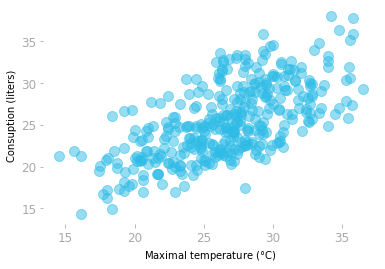

In [3]:
data_beer = pd.read_csv("https://raw.githubusercontent.com/hadrienj/" \
"essential_math_for_data_science/master/data/beer_dataset.csv")

plt.scatter(data_beer['Temperatura Maxima (C)'],
            data_beer['Consumo de cerveja (litros)'],
            alpha=0.5)
# [...] Add labels

plt.xlabel("Maximal temperature ($\degree$C)")
plt.ylabel("Consuption (liters)")
plt.show()


<img src="images/blank.png" id="fig:ch03_output_positive_covariance" alt="Figure 24: Example of variables with a positive covariance. The consumption of beer as a function of the temperature of the day. There are one point per day for the whole year 2015." />
Figure 24: Example of variables with a positive covariance. The consumption of beer as a function of the temperature of the day. There are one point per day for the whole year 2015.

You can see in Figure [24](#fig:ch03_output_positive_covariance) that
large values on the $x$-axis are associated with large values on the
$y$-axis and small values on the $x$-axis are associated with small
values on the $y$-axis. The consumption of beer increases when the
temperature increases.

Using the previous equation, you can calculate the covariance between
the consumption of beer and the maximal temperature with:

In [4]:
x = data_beer['Temperatura Maxima (C)']
y = data_beer['Consumo de cerveja (litros)']

np.sum((x - x.mean()) * (y - y.mean())) / x.shape[0]

12.172649474197785

You can also use the Numpy function `np.cov()`:

In [5]:
np.cov(data_beer['Temperatura Maxima (C)'],
       data_beer['Consumo de cerveja (litros)'])

array([[18.63964745, 12.20609082],
       [12.20609082, 19.35245652]])

The function `np.cov()` returns a *covariance matrix* (more details in
Section 2.1.3). The covariance is
the value outside of the diagonal: again around 12.2. It is different
than our result because it uses a correction named the *Bessel
correction* (the goal is to correct for an underestimation of the value.
You can find more details here:
https://www.statisticshowto.com/bessels-correction/) where the division
is done by the number of samples minus one. This can be changed setting
the parameter *ddof* (delta degree of freedom) to 0.

Note that since the covariance is calculated with the difference from
the mean, this metric depends on the scale of the variables. For
instance, large value for the variables leads to large covariance
values.

##### Negative covariance

Let’s now consider happiness as a function of perception of corruption
from the 2020 worldwide happiness report
(https://worldhappiness.report/ed/2020/) . Let’s load and plot the data:

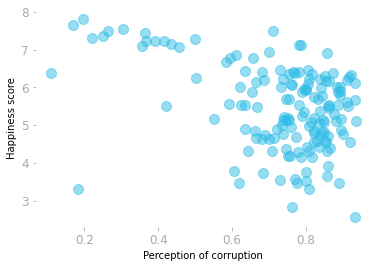

In [6]:
data_hap = pd.read_csv("https://raw.githubusercontent.com/hadrienj/" \
"essential_math_for_data_science/master/data/happiness_2020.csv")

plt.scatter(data_hap["Perceptions of corruption"],
            data_hap["Ladder score"],
            alpha=0.5)
# [...] Add labels

plt.xlabel("Perception of corruption")
plt.ylabel("Happiness score")
plt.show()


<img src="images/blank.png" id="fig:ch03_output_negative_covariance" alt="Figure 25: Example of data with a negative covariance." />
Figure 25: Example of data with a negative covariance.

You can see in Figure [25](#fig:ch03_output_negative_covariance) that
happiness decreases when perception of corruption increases. Let’s
calculate the covariance:

In [7]:
np.cov(data_hap["Perceptions of corruption"], data_hap["Ladder score"])

array([[ 0.03068538, -0.08150217],
       [-0.08150217,  1.23714494]])

As expected, the value of the covariance is negative (around -0.08).

#### Correlation

The *correlation*, usually refering to the *Pearson’s correlation
coefficient*, is a normalized version of the covariance. It is scaled
between -1 and 1, unlike the covariance, which can take any value
between negative infinity and positive infinity. A correlation of -1
means that there is a perfect negative linear relationship and a
correlation of 1 indicates a perfect positive linear relationship. A
correlation of 0 indicates that the variables are uncorrelated (no
linear relationship).

Mathematically, the correlation coefficient is calculated by dividing
the covariance by the product of the standard deviations of the two
variables. For instance, for two variables $x$ and $y$:

$$
\corr(x, y) = \frac{\cov(x, y)}{\sigma_x \sigma_y}
$$

Let’s take again the consumption of beer as a function of temperature,
as plotted in Figure [24](#fig:ch03_output_positive_covariance). You can
calculate the correlation between these variables with Numpy function
`np.corrcoef()`:

In [8]:
np.corrcoef(data_beer['Temperatura Maxima (C)'],
            data_beer['Consumo de cerveja (litros)'])

array([[1.        , 0.64267247],
       [0.64267247, 1.        ]])

Reading the value outside of the diagonal (which refer to the
correlation of each variable with itself), you can see that the value
obtained for the correlation coefficient is around 0.64.

Correlation is advantageous because you can compare it between pairs of
variables since it not depends on the scale of the data.

### 2.1.3 Covariance Matrix

#### Definition

When you previously used the function `np.cov()` from Numpy, it returned
more than one value: this is what we call a *covariance matrix* or a
*variance-covariance matrix*.

The covariance matrix is a way to structure variance and covariance
between two or more variables. With $n$ variables, the covariance matrix
is a $n$ by $n$ matrix. The diagonal is filled with the variance of each
variable, and the other cells correspond to the covariance between the
pairs variables, as illustrated in Figure
[26](#fig:ch03_covariance_matrix).

<img src="images/ch03_covariance_matrix.png" id="fig:ch03_covariance_matrix" width="150" alt="Figure 26: Illustration of a covariance matrix of the variables x, y." />
Figure 26: Illustration of a covariance matrix of the variables <span class="math inline"><em>x</em></span>, <span class="math inline"><em>y</em></span>.

The cells showing the covariance of a variable with itself, like the
covariance of the variable $x$ with the variable $x$, correspond to the
variance of this variable. Using the formula of the covariance and
applying it to the same variable $x$, you have:

$$
\begin{aligned}
\cov(x, x) &= \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})(x_i - \bar{x}) \\\\
&= \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2 \\\\
&= \var(x)
\end{aligned}
$$

This shows why the diagonal of the covariance matrix corresponds to the
variance of the variables.

2.2 Random Variables
--------------------

Unlike the variables you’re using in calculus, a *random variable* takes
a value corresponding to the outcome of a random experiment (like a coin
flip, for instance). The term *variable* tells us that the value is not
fixed (it depends on the event), and the term *random* comes from the
fact that the outcome is not fully determined: it can vary randomly.

More formally, a random variable is a function that takes an outcome as
input and returns a value. For instance, if you flip a coin, the two
possible outcomes are ‘heads’ and ‘tails’. An example of random variable
would map ‘heads’ to 0 and ‘tails to 1. As another example, let’s say
that you flip the coin 10 times, you could have a random variable that
maps the sequence of outcomes you get to the number of times you get
’heads’.

### 2.2.1 Definitions and Notation

#### Definitions

It is worth defining some terms in the context of probability theory.
Feel free to refer to these definition along your reading if needed.

A *random experiment*, or simply *experiment* describes a process that
gives you uncertain results, as a coin flip, for instance.

The *outcome* of a random experiment is the result you obtain. If you
flip a coin, the two possible outcomes are ‘heads’ and ‘tails’. If you
pick a card in a deck of 52 playing cards, the 52 possible outcomes are
the 52 playing cards. If you roll a six-sided die, the possible outcomes
are 1, 2, 3, 4, 5, or 6.

The *sample space* is the set of all possible outcomes. For instance,
the sample space of a dice-rolling experiment is $\{1, 2, 3, 4, 5, 6\}$.
The curly braces ($\{\}$) are used to denote sets (collections of
things). In an experiment where you flip a coin two times, the sample
space is
$\{\text{heads-heads}, \text{heads-tails}, \text{tails-heads}, \text{tails-tails}\}$.
The sample space is often denoted as $S$.

An *event* is a set of outcomes, that is, a subset of the sample space.
Intuitively, it corresponds to a question you can ask about the outcome
of a random experiment. For instance, if you roll a die, you can ask:

-   ‘Is the outcome a 3?’
-   ‘Is the outcome in the set $\{1, 3, 6\}$?’

These questions corresponds to individual events. An event has occurred
when the outcome of the experiment is an element of the event.

The *probability* associated with an event tells you how likely it is to
occur. Probabilities must satisfy the following rules:

-   It must be a non-negative real number.
-   It cannot exceed 1.
-   The probability that one of the possible outcomes will occur is 1.
-   For two mutually exclusive events, the probability that either of
    the events occurs is equal to the sum of the probability that each
    event occurs.

Roughly speaking, a probability of 1 means that the event will be always
satisfied and a probability of 0 means that the event will never be
satisfied. (however, in the case of continuous random variables where
the sample space is infinite, a probability of 1 means that the event is
*almost* certain to occur and a probability of 0 means that the event
will *almost* never take place.)

A *probability distribution function* (PDF) is a function that maps each
outcome to its probability mass (for discrete variables) or to
probability density (for continuous variable) to occur. You’ll see more
details about probability mass and density in
Section 2.3.

#### Notation

Now that we have defined the terms, let’s see the notation.

We’ll denote random variables with uppercase letters, such as $\rx$. The
probability distribution associated with the random variable $\rx$ is
denoted as $P(\rx)$. The probability that this random variable takes the
value $x$ is denoted as $P(\rx=x)$, or simply $P(x)$.

<img src="images/ch03_definitions_proba.png" id="fig:ch03_definitions_proba" width="400" alt="Figure 27: Summary of the relationship between the terms defined in the context of probability theory." />
Figure 27: Summary of the relationship between the terms defined in the context of probability theory.

Figure [27](#fig:ch03_definitions_proba) summarizes how the terms are
related between each other. An experiment is associated with various
possible outcomes. These outcomes are mapped to real values by a random
variable. There is thus a single random variable associated with the
experiment. Still in Figure [27](#fig:ch03_definitions_proba), the event
$A$ is a set of outcomes, here corresponding to a single outcome
(“outcome 1.”).

Let’s take an example.

<figure>
<img src="images/ch03_definitions_proba_example.png" id="fig:ch03_definitions_proba_example" width="400" alt="Figure 28: Example with a coin flip." /><figcaption aria-hidden="true">Figure 28: Example with a coin flip.</figcaption>
</figure>

Figure [28](#fig:ch03_definitions_proba_example) shows the case of a
coin flip experiment. The two possible outcomes are ‘heads’ or ‘tails’.
The random variable $\rx$ maps these outcomes to real values,
respectively 0 and 1. The event $A$ corresponds to the following set of
outcomes: {‘heads’}. This means that the probability that the outcome is
‘head’ can be denoted as:

$$
P(\rx=0) = P('heads') = P(A)
$$

### 2.2.2 Discrete and Continuous Random Variables

It is important to distinguish *discrete random variables*, where the
outcomes are in a *at most countable* list of possible values (meaning
that this list can be infinite but each element can be associated to a
natural number), and *continuous random variables*, which can take any
value in an interval.

##### Discrete Random Variables

Let’s say that you roll a six-sided die and the outcome is a number
between 1 and 6. You can model this experiment with a random variable
$\rx$ which can return the following values as possible outcome: 1, 2,
3, 4, 5 or 6. In this example, the random variable is *discrete*: it
takes discrete values between 1 and 6 (for instance, it can’t be 1.5).

##### Continuous Random Variables

Continuous random variables can take any value in a range. For instance,
if you calculate the heights of randomly selected people, the number of
possible outcomes is infinite (theoretically, because in the real world,
the measure would be discretized, for instance by the precision of the
measurement).

2.3 Probability Distributions
-----------------------------

*Deterministic* processes give the same results when they are repeated
multiple times. This is not the case for random variables, which
describe *stochastic* events, in which randomness characterizes the
process.

This means that random variables can take various values. How can you
describe and compare these values? One good way is to use the
probability that each outcome will occur. The probability distribution
of a random variable is a function that takes the sample space as input
and returns probabilities: in other words, it maps possible outcomes to
their probabilities.

In this section, you’ll learn about probability distributions for
discrete and continuous variables.

### 2.3.1 Probability Mass Functions

Probability functions of discrete random variables are called
*probability mass functions* (or PMF). For instance, let’s say that
you’re running a dice-rolling experiment. You call $\rx$ the random
variable corresponding to this experiment. Assuming that the die is
fair, each outcome is *equiprobable*: if you run the experiment a large
number of times, you will get each outcome approximately the same number
of times. Here, there are six possible outcomes, so you have one chance
over six to draw each number.

Thus, the probability mass function describing $\rx$ returns
$\frac{1}{6}$ for each possible outcome and 0 otherwise (because you
can’t get something different than 1, 2, 3, 4, 5 or 6).

You can write $P(\rx = 1) = \frac{1}{6}$, $P(\rx = 2) = \frac{1}{6}$,
and so on.

#### Properties of Probability Mass Functions

Not every function can be considered as a probability mass function. A
probability mass function must satisfy the following two conditions:

-   The function must return values between 0 and 1 for each possible
    outcome:

$$
0 \leq P(x) \leq 1
$$

-   The sum of probabilities corresponding to all the possible outcomes
    must be equal to 1:

$$
\sum\limits_{x \in S} P(x) = 1
$$

The value of $x$ can be any real number because values outside of the
sample space are associated with a probability of 0. Mathematically, for
any value $x$ not in the sample space $S$, $P(x)=0$.

#### Simulation of the Dice Experiment

Let’s simulate a die experiment using the function
`np.random.randint(low, high, size)` from Numpy which draw $n$ (`size`)
random integers between `low` and `high` (excluded). Let’s simulate 20
die rolls:

In [9]:

np.random.seed(123)

rolls = np.random.randint(1, 7, 20)
rolls

array([6, 3, 5, 3, 2, 4, 3, 4, 2, 2, 1, 2, 2, 1, 1, 2, 4, 6, 5, 1])

This array contains the 20 outcomes of the experiment. Let’s call $\rx$
the discrete random variable corresponding to the die rolling
experiment. The probability mass function of $\rx$ is defined only for
the possible outcomes and gives you the probability for each of them.

Assuming the die is fair, you should have an *uniform distribution*,
that is, equiprobable outcomes. (`np.random.randint()` draw samples from
an uniform distribution) .

Let’s visualize the quantity of each outcome you got in the random
experiment. You can divide by the number of trials to get the
probability. Let’s use `plt.stem()` from Matplotlib to visualize these
probabilities:

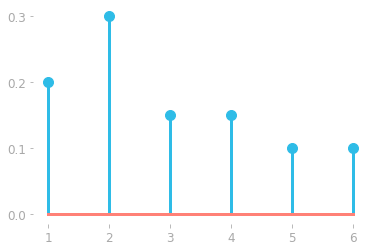

In [10]:
val, counts = np.unique(rolls, return_counts=True)
plt.stem(val, counts/len(rolls), basefmt="C2-", use_line_collection=True)

# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.show()


<img src="images/blank.png" id="fig:ch03_output_probability_function_discrete_estimated_10" alt="Figure 29: Probability mass function of the random variable \rx corresponding to a die rolling a six-sided die estimated from 20 rolls." />
Figure 29: Probability mass function of the random variable <span class="math inline">$\rx$</span> corresponding to a die rolling a six-sided die estimated from 20 rolls.

With a uniform distribution, the plot would have the same height for
each outcome (since the height corresponds to the probability, which is
the same for each outcome of a die throw). However, the distribution
shown in Figure
[29](#fig:ch03_output_probability_function_discrete_estimated_10)
doesn’t look uniform. That’s because you didn’t repeat the experiment
enough: the probabilities will stand when you repeat the experiment a
large number of times (in theory, an infinite number of times).

Let’s increase the number of trials:

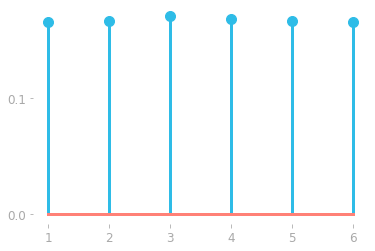

In [11]:

np.random.seed(123)

throws = np.random.randint(1, 7, 100000)
val, counts = np.unique(throws, return_counts=True)
plt.stem(val, counts/len(throws), basefmt="C2-", use_line_collection=True)

# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.show()


<img src="images/blank.png" id="fig:ch03_output_probability_function_discrete_estimated_100000" alt="Figure 30: Probability mass function of the random variable \rx corresponding to a die rolling experiment estimated from 100,000 rolls." />
Figure 30: Probability mass function of the random variable <span class="math inline">$\rx$</span> corresponding to a die rolling experiment estimated from 100,000 rolls.

With enough trials, the probability mass function showed in Figure
[30](#fig:ch03_output_probability_function_discrete_estimated_100000)
looks uniform. This underline the importance of the number of trials
from a frequentist probability point of view.

### 2.3.2 Probability Density Functions

With continuous variables, there is an infinite number of possible
outcomes (limited by the number of decimals you use). For instance, if
you were drawing a number between 0 and 1 you might get an outcome of,
for example, 0.413949834. The probability of drawing each number tends
towards zero: if you divide something by a very large number (the number
of possible outcomes), the result will be very small, close to zero.
This is not very helpful in describing random variables.

It is better to consider the probability of getting a specific number
within a range of values. The $y$-axis of probability density functions
is not a probability. It is called a *probability density* or just
*density*. Thus, probability distributions for continuous variables are
called *probability density functions* (or PDF).

The integral of the probability density function over a particular
interval gives you the probability that a random variable takes a value
in this interval. This probability is thus given by the area under the
curve in this interval (as you saw in
Section 1.2).

#### Notation

Here, I’ll denote probability density functions using a lowercase $p$.
For instance, the function $p(x)$ gives you the density corresponding to
the value $x$.

#### Example

Let’s inspect an example of probability density function. You can
randomly draw data from a normal distribution using the Numpy function
`np.random.normal` (you’ll find more details about the normal
distribution in Section 3.2).

You can choose the parameters of the normal distribution (the mean and
the standard deviation) and the number of samples. Let’s create a
variable `data` with 1,000 values drawn randomly from a normal
distribution with a mean of 0.3 and a standard deviation of 0.1.

In [12]:
np.random.seed(123)
data = np.random.normal(0.3, 0.1, 1000)

Let’s look at the shape of the distribution using an histogram. The
function `plt.hist()` returns the exact values for the $x$- and
$y$-coordinates of the histogram. Let’s store this in a variable called
`hist` for latter use:

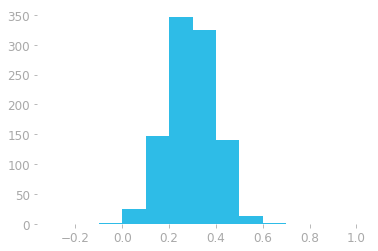

In [13]:
hist = plt.hist(data, bins=13, range=(-0.3, 1))

<img src="images/blank.png" id="fig:ch03_output_histogram" alt="Figure 31: Histogram of the data generated from a normal distribution. The x-axis is the value of the element in the vector and the y-axis the number of elements (count) that are in the corresponding range." />
Figure 31: Histogram of the data generated from a normal distribution. The <span class="math inline"><em>x</em></span>-axis is the value of the element in the vector and the <span class="math inline"><em>y</em></span>-axis the number of elements (count) that are in the corresponding range.

*Histograms* show how values are distributed. It is a way to model a
probability distribution using a finite number of values from the
distribution. Since we’re dealing with continuous distributions, this
histogram corresponds to the number of values for specific intervals
(the intervals depends on the parameter `bins` in the function
`hist()`).

For instance, Figure [31](#fig:ch03_output_histogram) shows that there
are around 347 elements in the interval \[0.2, 0.3\]. Each bin
corresponds to a width of 0.1, since we used 13 bins to represent data
in the range -0.3 to 1.

Let’s have a closer look at the distribution with more bins. You can use
the parameter `density` to make the $y$-axis correspond to the
probability density instead of the count of values in each bin:

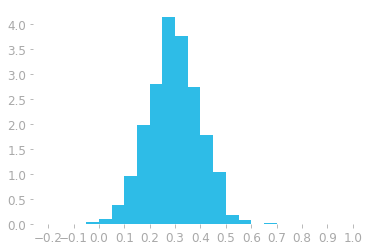

In [14]:
hist = plt.hist(data, bins=24, range=(-0.2, 1), density=True)

# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))


<img src="images/blank.png" id="fig:ch03_output_histogram_density" alt="Figure 32: Histogram using 30 bins and density instead of counts." />
Figure 32: Histogram using 30 bins and density instead of counts.

You can see in Figure [32](#fig:ch03_output_histogram_density) that
there are more bins in this histogram (24 instead of 13). This means
that each bin has now a smaller width. The $y$-axis is also on a
different scale: it corresponds to the density, not the counter of
values as before.

To calculate the probability to draw a value in a certain range from the
density, you need to use the area under the curve. In the case of
histograms, this is the area of the bars.

Let’s take an example with the bar ranging from 0.2 to 0.25, associated
with the following density:

In [15]:
print(f"Density: {hist[0][8].round(4)}")
print(f"Range x: from {hist[1][8].round(4)} to {hist[1][9].round(4)}")

Density: 2.8
Range x: from 0.2 to 0.25


Since there are 24 bins and the range of possible outcomes is from -0.2
to 1, each bar corresponds to a range of
$\frac{1-(-0.2)}{24}=\frac{1.2}{24}=0.05$. In our example, the height of
the bar (the one from 0.2 to 0.25) is around 2.8, so the area of this
bar is $2.8 \cdot 0.05 = 0.14$. This means that the probability of
getting a value between 0.2 and 0.25 is around 0.14, or 14%.

You saw that the sum of the probabilities must be equal to one, so the
sum of the bar’s areas should be equal to one. Let’s check that: you can
take the vector containing the densities (`hist[0]`) and multiply it by
the bar width (0.05):

In [16]:
(hist[0] * 0.05).sum().round(4)

1.0

All good: the sum of the probabilities is equal to one.

#### From Histograms to Continuous Probability Density Functions

Histograms represent a binned version of the probability density
function. Figure [33](#fig:ch03_probability_density_function_area) shows
a representation of the true probability density function. The blue
shaded area in the figure corresponds to the probability of getting a
number between 0 and 0.2 (the area under the curve between 0 and 0.2).

<img src="images/ch03_probability_density_function_area.png" id="fig:ch03_probability_density_function_area" width="300" alt="Figure 33: The probability to draw a number between 0 and 0.2 is the highlighted area under the curve." />
Figure 33: The probability to draw a number between 0 and 0.2 is the highlighted area under the curve.

#### Properties of Probability Density Functions

Like probability mass functions, probability density functions must
satisfy some requirements. The first is that it must return only non
negative values. Mathematically written:

$$
p(x) \geq 0
$$

The second requirement is that the total area under the curve of the
probability density function must be equal to 1:

$$
\int_{-\infty}^{\infty} p(x) \; dx = 1
$$

In this part on probability distributions, you saw that probability mass
functions are for discrete variables and probability density functions
for continuous variables. Keep in mind that the value on the $y$ axis of
probability mass functions are probabilities, which is not the case for
probability density functions. Look at the density values (for instance
in Figure [32](#fig:ch03_output_histogram_density)): they can be larger
than one, which shows that they are not probabilities.

2.4 Joint, Marginal, and Conditional Probability
------------------------------------------------

In some cases, you need to consider the probability that more than one
event occurs. You’ll see here how to handle this situation.

### 2.4.1 Joint Probability

*Joint probability* is the probability that two or more events occur.

#### Notation

The *joint probability* that the random variable $\rx$ takes the value
$x$ and that the random variable $\ry$ takes the value $y$ is written:

$$
P(\rx=x, \ry=y)
$$

You must consider the dependence between these events. So, let’s first
look at the concept of dependency between events.

#### Dependent and Independent Events

*Dependent events* are events that are related in the sense that the
probability of one depends on the outcome of the other. For instance, if
you randomly pick two balls from a bag without replacement, the
probabilities associated with the second pick depend on the outcome of
the first pick.

<img src="images/ch03_dependent_events.png" id="fig:ch03_dependent_events" width="200" alt="Figure 34: Examples of dependent events with a draw without replacement." />
Figure 34: Examples of dependent events with a draw without replacement.

Figure [34](#fig:ch03_dependent_events) illustrates the following
example: there are 4 red balls and 2 blue balls in the bag. The
probability of choosing a red ball is $\frac{4}{6}$ and $\frac{2}{6}$ to
choose a blue ball.

If you pick a red ball the first time, the probability of picking
another red ball in the second draw is $\frac{3}{5}$; that of picking a
blue ball is $\frac{2}{5}$ (as illustrated in the bottom right).
However, if you get a blue ball at the first draw, the probability of
picking a red ball on the second draw is $\frac{4}{5}$ and $\frac{1}{5}$
to pick another blue ball (top right). The first draw has an influence
on the probability distribution of the second.

By contrast, *independent events* are events that don’t interfere with
each other. For instance, if you roll two dice, you don’t expect that
the outcome of one will affect the outcome of the other.

#### Joint Probability of Independent and Dependent Events

##### Independent Events

If two random variables $\rx$ and $\ry$ are independent, their joint
probability is equal to the product of the probability of each event.
Mathematically, you can write:

$$
P(\rx=x, \ry=y) = P(\rx=x) P(\ry=y)
$$

##### Dependent Events

For dependent events, you’ll need to use rules from conditional
probabilities (as we’ll detail in
Section 2.4.3) to calculate
their joint probability.

#### Example with Independent Events

For instance, if you throw a die and toss a coin, what is the
probability to get a 6 and ‘heads’?

To answer this question, you need to consider both events. The joint
probability is calculated by multiplying the probability of each event
together:

$$
P(\rx=6, \ry=\text{'heads'}) = \frac{1}{6} \times \frac{1}{2} = \frac{1}{12}
$$

Note that $P(\ry=\text{'heads'})$ is a shortcut because random variables
maps outcomes to real values: it means that the experiment associated
with the random variable $\ry$ has the outcome ‘heads’.

### 2.4.2 Marginal Probability

In some cases, you’ll have the joint probability of multiple events and
you’ll want to calculate the probability of one of the events
individually, without considering the others. Such probabilities are
called *marginal probabilities*.

In the preceding example of a coin toss and a die throw, the marginal
probabilities are simply the probabilities of single events
(respectively, $\frac{1}{6}$ and $\frac{1}{2}$).

<img src="images/ch03_joint_marginal_probability.png" id="fig:ch03_joint_marginal_probability" width="400" alt="Figure 35: Joint and marginal probability." />
Figure 35: Joint and marginal probability.

Figure [35](#fig:ch03_joint_marginal_probability) summarizes the joint
and marginal probabilities for this example. Let’s see the rule of this
calculation.

#### The Sum Rule

Marginal probabilities are obtained from joint probabilities by
*marginalizing* the other variables using the *sum rule of probability*:
you add the joint probabilities. Mathematically, it is defined as
follows:

$$
P(\rx=x) = \sum_{y} P(\rx=x, \ry=y)
$$

The marginal probability $P(\rx=x)$ is the probability that $\rx=x$
without considering the other variables. This is calculated as the sum
of the probabilities that $\rx=x$ and $\ry=y$, for all values of $y$:
$\sum_{y} P(\rx=x, \ry=y)$.

Let’s take again the case of a die throw and coin flip experiment. For
instance, the marginal probability of $\rx=6$ is the sum of the
following joint probabilities: $P(\rx=6, \ry=\text{'heads'})$ and
$P(\rx=6, \ry=\text{'tails'})$. It is thus:

$$
\begin{aligned}
\sum_y P(\rx=6, \ry=y) &= P(\rx=6, \ry=\text{'heads'}) + P(\rx=6, \ry=\text{'tails'}) \\\\
&= \frac{1}{12} + \frac{1}{12}
= \frac{1}{6}
\end{aligned}
$$

Looking at Figure [35](#fig:ch03_joint_marginal_probability), the
marginal probability is the sum of the elements in the column
corresponding to $\rx=6$.

#### Marginal Probability Density Functions

In the case of continuous variables, you calculate the marginal
probabilities by integrating the joint probability distribution with
respect to one of the variables.

Let’s visualize the join probability functions of two continuous random
variables, $\rx$ and $\ry$, to understand how it works. Since there are
two variables, the density needs to be represented on a
three-dimensional plot.

Note also that the joint probability distribution is constructed with
the product of each probability density (you can refer to the code in
the notebook). You’ll see that the density is calculated as
`z = gaussian(xy[:, 0], 0.4, 0.1) * gaussian(xy[:, 1], 0.6, 0.05)`.

In [17]:

def gaussian(x, mu, sigma):
    return (1 / np.sqrt(2 * np.pi * sigma ** 2)) *\
        np.exp((-1/2) * ((x - mu) / sigma) ** 2)


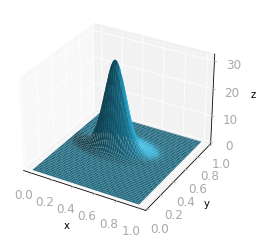

In [18]:

x, y = np.mgrid[0:1:0.01, 0:1:0.01]
xy = np.column_stack([x.flat, y.flat])

mu_x = 0.4
sigma_x = 0.1
mu_y = 0.6
sigma_y = 0.05

z = gaussian(xy[:, 0], mu_x, sigma_x) * gaussian(xy[:, 1], mu_y, sigma_y)
z = z.reshape(x.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z)
ax.set_ylim(0, 1)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


<img src="images/blank.png" id="fig:ch03_output_joint_distribution" alt="Figure 36: Joint probability distribution of the random variables \rx and \ry." />
Figure 36: Joint probability distribution of the random variables <span class="math inline">$\rx$</span> and <span class="math inline">$\ry$</span>.

Figure [36](#fig:ch03_output_joint_distribution) shows the joint
probability density function of $\rx$ and $\ry$. The total volume of
this shape must be equal to one. This volume is calculated using a
*double integral* (you first integrate with respect to one of the
variables, and then with respect to the other. You can find here a great
resource about double integrals:
https://www.khanacademy.org/math/multivariable-calculus/integrating-multivariable-functions/double-integrals-a/a/double-integrals
) .

To find the marginal probability density of $\ry$, you’ll need to
integrate with respect to $\rx$, meaning that you consider $\ry$ as a
constant. Graphically, it corresponds to do slices on the $x$-axis at
different values of $\ry$.

<figure>
<img src="images/ch03_joint_distribution_one_slice.png" id="fig:ch03_joint_distribution_one_slice" width="200" alt="Figure 37: Distribution of \rx at \ry=0.55." /><figcaption aria-hidden="true">Figure 37: Distribution of <span class="math inline">$\rx$</span> at <span class="math inline">$\ry=0.55$</span>.</figcaption>
</figure>

For instance, Figure [37](#fig:ch03_joint_distribution_one_slice) shows
a slice at $\ry=0.55$. This area is one point of the probability density
function of $\rx$.

<figure>
<img src="images/ch03_joint_distribution_10_slices_density.png" id="fig:ch03_joint_distribution_10_slices_density" width="200" alt="Figure 38: The area under the curve of each slice corresponds to a point in the probability density function." /><figcaption aria-hidden="true">Figure 38: The area under the curve of each slice corresponds to a point in the probability density function.</figcaption>
</figure>

If you repeat this for all values of $\ry$, you get the whole
probability density distribution: the probability density function of
$\ry$ is constructed as the areas of the slices, as illustrated in
Figure [38](#fig:ch03_joint_distribution_10_slices_density).

To summarize, when you integrate with respect to $\rx$, denoted as
$\int p(x, y)dx$, you get a function that gives the area of the slice
for a specific value of $\ry$. This area corresponds to one point on the
probability density distribution of $\ry$.

#### Example

Let’s check the previous statement by comparing the slice areas and the
density function of $\ry$ with an example of the previous random
variables $\rx$ and $\ry$.

Let’s create the variable `z`, as in Figure
[36](#fig:ch03_output_joint_distribution):

In [19]:
x, y = np.mgrid[0:1:0.01, 0:1:0.01]
xy = np.column_stack([x.flat, y.flat])

z = gaussian(xy[:, 0], mu_x, sigma_x) * gaussian(xy[:, 1], mu_y, sigma_y)
z = z.reshape(x.shape)

z.shape

(100, 100)

You can extract slices from `z` with for instance `z[:, 0]`, which is
the first slice, corresponding to $\ry=0$. Slices are separated by 0.01.
If you plot one of the slices, you get Figure
[39](#fig:ch03_output_one_slice):

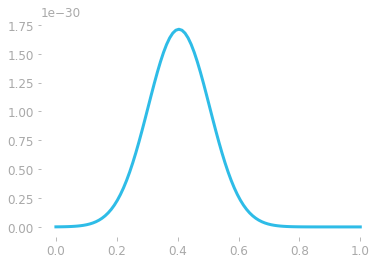

In [20]:
x_axis = np.linspace(0, 1, z.shape[0])
plt.plot(x_axis, z[:, 0])

plt.show()


<img src="images/blank.png" id="fig:ch03_output_one_slice" alt="Figure 39: The first slice." />
Figure 39: The first slice.

You want to calculate the area under the curve shown in Figure
[39](#fig:ch03_output_one_slice). To estimate it, simply calculate the
sum of each value multiplied by the step (0.01 because you have one
point every 0.01):

In [21]:
(z[:, 0] * 0.01).sum()

4.292658322616401e-31

This value is the area under the curve of the first slice.

Now that you’ve got the idea, let’s do this for every slice:

In [22]:
estimated_probability_density = np.zeros(x_axis.shape[0])

for i in range(z.shape[1]):
    slice_area = (z[:, i] * 0.01).sum()
    estimated_probability_density[i] = slice_area

Let’s compare what you obtain with the true density distribution that
you got as `density_y`:

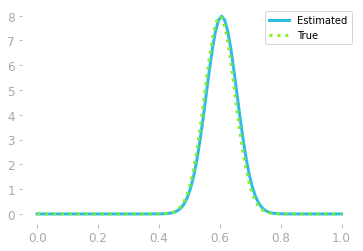

In [23]:
density_y = gaussian(x_axis, mu_y, sigma_y)

plt.plot(x_axis, estimated_probability_density, label="Estimated")
plt.plot(x_axis, density_y, linestyle=':', label="True")

plt.legend()
plt.show()


<img src="images/blank.png" id="fig:ch03_output_comparison_estimated_true" alt="Figure 40: Comparison of the estimated and true marginal probability functions." />
Figure 40: Comparison of the estimated and true marginal probability functions.

That’s good: you can see in Figure
[40](#fig:ch03_output_comparison_estimated_true) that these two density
functions are quite identical, showing that the marginal probability
density function can be obtained from the joint probability
distribution.

#### Conclusion

To go from the joint probability distribution to the marginal
probability distribution, you calculate the integral of the joint
probability distribution $p(x, y)$ with respect to one of the variable,
such as:

$$
p(y) = \int p(x, y) \; dx
$$

and

$$
p(x) = \int p(x, y) \; dy
$$

In the previous example, we approximated the integral by calculating the
area under the curve using slices as you saw in
Section 1.2.

### 2.4.3 Conditional Probability

In some cases, you will want to calculate the probability that an event
will occur knowing that another event has already occurred. For
instance, you can ask what is the probability to draw a pair of kings in
a deck of playing cards. You need to calculate the probability of
getting a king in the first draw, and then the probability to draw a
second king. You want to know the probability of the second draw *under
the condition* that you got a king in the first draw.

This is called *conditional probability*: the probability of an event
given that another event has occurred.

#### Notation

We refer to conditional probability using the vertical bar (“\|”), as
follows:

$$
P(\ry=y | \rx=x)
$$

The conditional probability $P(\ry=y | \rx=x)$ is the probability that
the random variable $\ry$ equals $y$ *given that* the random variable
$\rx$ equals $x$. Note that this notation differs from
$P(\ry=y, \rx=x)$, which is the probability that both $\rx=x$ and
$\ry=y$.

#### Example

Samantha’s car sometimes shows a warning light when there is a problem,
but it is defective: sometimes the warning light comes on even when
there is no problem, and sometimes the light is off but the car needs
repair.

Let’s call $P(\text{warning light})$ the probability of the event “the
warning light is on” and $P(\text{needs repair})$ the probability of the
event “the car needs repair”.

<img src="images/ch03_conditional_proba.png" id="fig:ch03_conditional_proba" width="400" alt="Figure 41: The probability that the car needs repair is illustrated in blue and the probability that the warning light is on is illustrated in red, for five observations." />
Figure 41: The probability that the car needs repair is illustrated in blue and the probability that the warning light is on is illustrated in red, for five observations.

Figure [41](#fig:ch03_conditional_proba) illustrates the probabilities
that the car needs repair (in blue) and the probability that the warning
light is on (in red). The figure shows the data for five observations
(the five columns from ‘Obs. 1’ to ‘Obs. 5’). For each of them, Samantha
looked at the status of the car (needs repair or not) and the warning
light (on or off). A blue square tells that the car needed repair and a
red square that the warning light was on. For instance, in the first
observation, the car needed repair but the warning light was off (no red
square).

You can see that $P(\text{needs repair})=\frac{4}{5}$ because there are
four observations where the car needed repair out of a total of five
observations. Similarly, $P(\text{warning light})=\frac{2}{5}$ because
there are two observations where the warning light was on. There is also
an observation with a blue and a red square: the car needed repair and
the warning light was on, so
$P(\text{needs repair}, \text{warning light})=\frac{1}{5}$.

Let’s examine the conditional probabilities for this example. The
statement $P(\text{needs repair} | \text{warning light})$ is the
probability that the car needed repair given that the warning light was
on. You can think of this probability as follows: you take only the
observations where the warning light was on (‘Obs. 4’ and ‘Obs. 5’), and
then you look at the proportion of observations where car needed repair.
These conditions are met in one observation out of the two so
$P(\text{needs repair} | \text{warning light})=\frac{1}{2}$.

The same idea can be used to find
$P(\text{warning light} | \text{needs repair})$. You take the
observations where the car needed repair and consider the number of
times the warning light was on. You can see that this is one observation
out of four.

To summarize, conditional probability is the probability of a subset of
the observations (depending on the condition). The link between
conditional and joint probability is formalized in the next section.

#### The Product Rule of Probability

For discrete random variables, the probability that $\rx=x$ *and*
$\ry=y$ (joint probability) equals the probability that $\rx=x$
multiplied by the probability that $\ry=y$ given that $\rx=x$
(conditional probability). Mathematically, you have:

$$
P(\rx=x, \ry=y) = P(\ry=y | \rx=x) P(\rx=x)
$$

This is the *product rule of probability*, also called the *chain rule
of probability*. Equivalently, you can write:

$$
P(\ry=y | \rx=x) = \frac{P(\rx=x, \ry=y)}{P(\rx=x) }
$$

Let’s see the logic behind these two formulations of the product rule
using the previous example.

First, the joint probability
$P(\text{needs repair}, \text{warning light})$ is:

$$
P(\text{needs repair}, \text{warning light}) = P(\text{warning light} | \text{needs repair}) P(\text{needs repair})
$$

The probability that the car needs repair and the warning light is on
($P(\text{needs repair}, \text{warning light})$) will be smaller than
$P(\text{warning light} | \text{needs repair})$. To consider all
observations, you need to multiply by the proportion of observations
where the car needs repair ($P(\text{needs repair})$).

Let’s see the second statement with the same example:

$$
P(\text{warning light} | \text{needs repair}) = \frac{P(\text{needs repair}, \text{warning light})}{P(\text{needs repair}) }
$$

Similarly, to go from all observations to only the observations where
the car needs repair, you need this time to divide by
$P(\text{needs repair})$.

#### More Events

We can generalize the product rule to more events. For instance, with
three events $A$, $B$ and $C$, you would have:

$$
P(A, B, C) = P(A | B, C) P(B, C)
$$

This means that the probability that the events $A$, $B$ and $C$
occurred is equal to the probability that $A$ occurred given that $B$
and $C$ occurred multiplied by the probability that $B$ and $C$
occurred.

You can chain these probability products. Since the product rule says
that:

$$
P(B, C) = P(B | C) P(C)
$$

You get:

$$
P(A, B, C) = P(A | B, C)  P(B | C) P(C)
$$

2.5 Cumulative Distribution Functions
-------------------------------------

*Cumulative distribution functions* (CDFs) are an alternative way to
describe a random variable. The CDF corresponds to the probability that
a random variable will take a value less than or equal to the value $x$.
Let’s denote $F_{\rx}(x)$ the CDF of the random variable $\rx$:

$$
F_{\rx}(x) = P(\rx \leq x)
$$

When $x$ increases, the probability necessarily increases because all
values smaller than $x$ are considered (hence, the name *cumulative*).
Thus, cumulative distribution functions are always non-decreasing going
from 0 to 1.

Let’s look at the following normal distribution (you can find more
details on normal distribution in
Section 3.2) and its CDF:

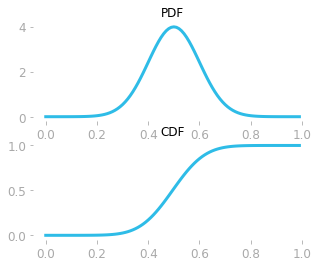

In [24]:

x_axis = np.arange(0, 1, 0.01)
pdf = gaussian(x_axis, 0.5, 0.1)
cdf = np.cumsum(pdf)
cdf = (cdf - cdf.min()) / (cdf.max() - cdf.min())

f, axes = plt.subplots(2, 1, figsize=(5, 4))
axes[0].plot(x_axis, pdf)
axes[0].set_title("PDF")
axes[1].plot(x_axis, cdf)
axes[1].set_title("CDF")
plt.show()


<img src="images/blank.png" id="fig:ch03_output_pdf_cdf" alt="Figure 42: Probability density function (top panel) and cumulative density function (bottom panel) for a normal distribution with a mean of 0.5 and a standard deviation of 0.1." />
Figure 42: Probability density function (top panel) and cumulative density function (bottom panel) for a normal distribution with a mean of 0.5 and a standard deviation of 0.1.

Figure [42](#fig:ch03_output_pdf_cdf) shows a plot of the probability
density function using a normal distribution of mean 0.5 and standard
deviation 0.1. The cumulative distribution function is shown in the
bottom panel. The PDF corresponds to the derivative of the CDF.

2.6 Expectation and Variance of Random Variables
------------------------------------------------

The *expected value*, or *expectation*, of a random variable is the
average value you’ll get when you consider a large number of trials. The
expected value of a random variable $\rx$ is written as
$\expval[\rx\rbrack$.

### 2.6.1 Discrete Random Variables

For a discrete variable, the expected value corresponds to the sum of
each outcome weighted by its probability:

$$
\expval[\rx\rbrack = \sum_{i=1}^n P(x_i) x_i
$$

with $\rx$ the random variable having $n$ possible outcomes, $x_i$ being
the $i$th possible outcome that has a probability $P(x_i)$ to occur.

#### Example

For instance, let’s take a random variable $\rx$ that can take the
following values $x$: 1, 5, 10 or 100. Let’s say that the distribution
is uniform: the outcomes are equiprobable, each with a probability of
$\frac{1}{4}$. The expected value is:

$$
\begin{aligned}
\expval[\rx\rbrack &= P(\rx=1) \cdot 1 + P(\rx=5) \cdot 5 + P(\rx=10) \cdot 10 + P(\rx=100) \cdot 100 \\\\
&= \frac{1}{4} \cdot 1 + \frac{1}{4} \cdot 5 + \frac{1}{4} \cdot 10 + \frac{1}{4} \cdot 100 \\\\
&= \frac{1}{4} + \frac{5}{4} + \frac{10}{4} + \frac{100}{4}
= \frac{116}{4}
= 29
\end{aligned}
$$

This means that if you repeat the experiment a large number of time,
you’ll get in average a value of 29.

You can simulate random trials with the function `np.random.choice()`
and calculate the average of the outcomes. Let’s plot the average value
in a function of the number of trials:

In [25]:
np.random.seed(123)

def run_trials(n_trials, choices):
    outcomes = np.zeros(n_trials)

    for i in range(n_trials):
        outcomes[i] = np.random.choice(choices)

    return outcomes.mean()

n_trials = np.arange(1, 10000, 100)
outcomes_average = np.zeros(n_trials.shape[0])
count = 0
for n_trial in n_trials:
    outcomes_average[count] = run_trials(n_trials=n_trial, choices=[1, 5, 10, 100])
    count += 1

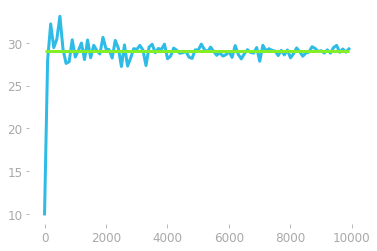

In [26]:
plt.plot(n_trials, outcomes_average, zorder=0)
plt.hlines(y=29, xmin=1, xmax=n_trials[-1], color='#84EE29')

plt.show()


<img src="images/blank.png" id="fig:ch03_output_expected_value" alt="Figure 43: The average of the outcomes (y-axis) of a random experiment for different number of trials (from 1 to 10000, as shown in the x-axis). The expected value previously calculated is represented as a green horizontal line." />
Figure 43: The average of the outcomes (<span class="math inline"><em>y</em></span>-axis) of a random experiment for different number of trials (from 1 to 10000, as shown in the <span class="math inline"><em>x</em></span>-axis). The expected value previously calculated is represented as a green horizontal line.

Figure [43](#fig:ch03_output_expected_value) shows that with enough
trials, the result approaches the expected value you calculated (29).

### 2.6.2 Continuous Random Variables

For continuous variables, the idea is similar; you’ll just need to
integrate instead of summing the weighted outcomes.

$$
\expval[\rx\rbrack = \int p(x) x \; dx
$$

### 2.6.3 Variance of Random Variables

The variance of a random variable is a metric describing the spread of
the possible outcomes of the variable. You saw in
Section 2.1.1 that
the variance is the mean of the squared differences from the mean. With
random variables, it is the expected value of the squared differences
from the expected value:

$$
Var(\rx) = \expval[ (\rx - \expval[\rx\rbrack)^2 \rbrack
$$

The variance of a random variable gives information about the
variability of the samples, with a low value when the values agglomerate
around the expected value and a large value when they are more spread.

2.7 Hands-On Project: The Central Limit Theorem
-----------------------------------------------

For this hands-on project, you’ll need some knowledge about uniform and
Gaussian distributions (you can refer respectively to
Section 3.1 and
Section 3.2).

The *central limit theorem* says that, if you consider multiple
independent random variables drawn from a distribution with $n$ large
enough and average or sum their outcomes, the distribution of the
results will be approximated by a Gaussian distribution.

### 2.7.1 Continuous Distribution

Let’s implement an experiment to illustrate the central limit theorem
with various number of random variables. At each of the 10000 trials of
this experiment, you’ll get random values from uniform distributions for
each random variables and average these values. So you’ll get one value
per trial and look at the distribution of these values.

In [27]:
def mean_distribution_uniform(n_random_var):
    n_trials = 10000
    all_trials = np.zeros(n_trials)
    for i in range(n_trials):
        all_random_var = np.zeros(n_random_var)
        for random_var in range(n_random_var):
            all_random_var[random_var] = np.random.uniform(0, 1)
        all_trials[i] = all_random_var.mean()

    return all_trials

This function allows us to do the experiment with various number of
random variables (the parameter `n_random_var`). Let’s use it with one,
two, and five random variables and look at the distribution of the
results with histograms:

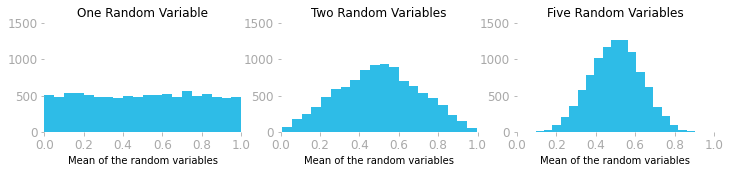

In [28]:

np.random.seed(123)

random_var_uniform_1 = mean_distribution_uniform(1)
random_var_uniform_2 = mean_distribution_uniform(2)
random_var_uniform_5 = mean_distribution_uniform(5)

f, axes = plt.subplots(1, 3, figsize=(12, 2))
axes[0].hist(random_var_uniform_1, bins=20)
axes[1].hist(random_var_uniform_2, bins=20) 
axes[2].hist(random_var_uniform_5, bins=20) 
# [...] Add titles, limits etc.

axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1500)
axes[0].set_title("One Random Variable")
axes[0].set_xlabel('Mean of the random variables')

axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1500)
axes[1].set_title("Two Random Variables")
axes[1].set_xlabel('Mean of the random variables')

axes[2].set_xlim(0, 1)
axes[2].set_ylim(0, 1500)
axes[2].set_title("Five Random Variables")
axes[2].set_xlabel('Mean of the random variables')
plt.show()


<img src="images/blank.png" id="fig:ch03_output_mean_random_variables_uniform" alt="Figure 44: Histograms showing the distribution of the mean values over 1, 2 or 5 random variables." />
Figure 44: Histograms showing the distribution of the mean values over 1, 2 or 5 random variables.

Figure [44](#fig:ch03_output_mean_random_variables_uniform) shows that
the distribution looks more and more like a Gaussian distribution as the
number of random variables increases.

### 2.7.2 Discrete Distribution

The central limit theorem can also be observed with discrete variables.
Let’s say that we roll some dice and look at the sum of the outcomes (in
the previous example, you looked at the mean of the outcomes: using the
sum is equivalent). For instance, rolling two dice and getting 1 and 5
would lead to a sum of 6.

Let’s start by implementing the new trial function:

In [29]:
def mean_distribution_dice(n_dice):
    n_trials = 100000
    all_trials = np.zeros(n_trials)
    for i in range(n_trials):
        all_dice = np.zeros(n_dice)
        for dice in range(n_dice):
            all_dice[dice] = np.random.choice([1, 2, 3, 4, 5, 6])
        all_trials[i] = all_dice.sum()

    return all_trials

Now, you’ll use this function to evaluate the distribution of the sums
for 1, 2 and 20 dice:

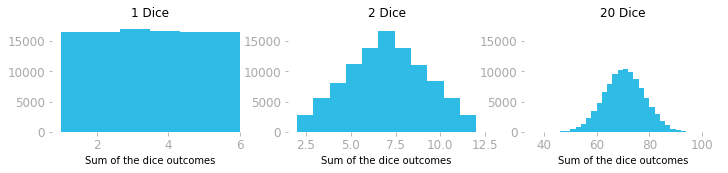

In [30]:

np.random.seed(123)

random_var_dice_1 = mean_distribution_dice(1)
random_var_dice_2 = mean_distribution_dice(2)
random_var_dice_20 = mean_distribution_dice(20)

f, axes = plt.subplots(1, 3, figsize=(12, 2))
axes[0].hist(random_var_dice_1, bins=6) 
axes[1].hist(random_var_dice_2, bins=11) 
axes[2].hist(random_var_dice_20, bins=34) 
# [...] Add titles, limits etc.

axes[0].set_ylim(0, 18000)
axes[0].set_title("1 Dice")
axes[0].set_xlabel('Sum of the dice outcomes')

axes[1].set_ylim(0, 18000)
axes[1].set_title("2 Dice")
axes[1].set_xlabel('Sum of the dice outcomes')

axes[2].set_ylim(0, 18000)
axes[2].set_title("20 Dice")
axes[2].set_xlabel('Sum of the dice outcomes')
plt.show()


<img src="images/blank.png" id="fig:ch03_output_mean_random_variables_dice" alt="Figure 45: Histograms showing the distribution of the sums of the outcomes in the dice experiment." />
Figure 45: Histograms showing the distribution of the sums of the outcomes in the dice experiment.

You can see in Figure [45](#fig:ch03_output_mean_random_variables_dice)
that the same phenomenon shown in Figure
[44](#fig:ch03_output_mean_random_variables_uniform) occurs when
variables are drawn from a discrete distribution.

In the next chapter, you’ll see more details about the uniform and
Gaussian distribution.

